<a href="https://colab.research.google.com/github/Jeyakumar30/Sales-Prediction/blob/main/Sales_Prediction_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Sales Prediction using Python***


#**Introduction**


In today's competitive business world, predicting sales accurately is a game-changer. This project dives deepen into the data science to harness the power of machine learning for sales forecasting.

Throughout this journey, I'll explore various machine learning models, from linear regression to advanced techniques like decision trees and gradient boosting.

#**Data Science Process**

#I. Setting the Research Goal

##**Research Goal:**
To explore and implement various machine learning models to predict sales based on advertising spending.

**Key Objectives:**

1. Preprocessing
2. Feature Importance
3. Exploratory Data Analysis
4. Predictive Modeling
5. Model Evaluation
6. Interpretation of results

#II. Data Retrieval


The dataset for this analysis was sourced from Kaggle, a platform known for hosting diverse datasets and fostering collaborative data science projects. The dataset, titled "Advertising Dataset" encapsulates information about money spent through various forms.

The dataset consist of a file: "advertising.csv". The CSV file is composed of the following attributes: TV,	Radio,	Newspaper,	Sales.


Subsequently, the data was imported into a Google Colab Notebook environment for analysis, visualizations, and insights into the exploration of sales figure prediction using Python.

###Importing Required Libraries


In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from joblib import dump, load

###Loading Data

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/CodSoft Internship/advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


###Understanding Data



1. **TV:**
   - *Description:* This represents the advertising budget spent on TV commercials.
   - *Significance:* TV advertising is a powerful tool for reaching a mass audience.

2. **Radio:**
   - *Description:* This variable denotes the advertising expenditure on radio campaigns which communicates messages through sound.
   - *Significance:* Radio ads can be effective for reaching local audiences, offering a different reach compared to TV.

3. **Newspaper:**
   - *Description:* Newspaper advertising expenses are denoted by this variable. They convey detailed information to a diverse readers through print medium.
   - *Significance:* Newspaper ads provides in-depth information and particularly effective for one who interested in detailed content.

4. **Sales:**
   - *Description:* This is the target variable, representing the sales figures from the advertising expenditures on TV, Radio, and Newspaper.
   - *Significance:* Sales serve as the key metric for assessing the effectiveness of the advertising strategies.

#III. Data Preparation

Let us check the shape of dataset

In [ ]:
sales_df.shape

(200, 4)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##1. Data Cleansing

###Handling Missing Values

 Let us check the total number of missing values in each column.

In [ ]:
# Checking for missing values in the entire dataset
print(sales_df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


There is no missing values in the dataset. So, we can move onto the next step of data science process model.


###Checking for Outlier

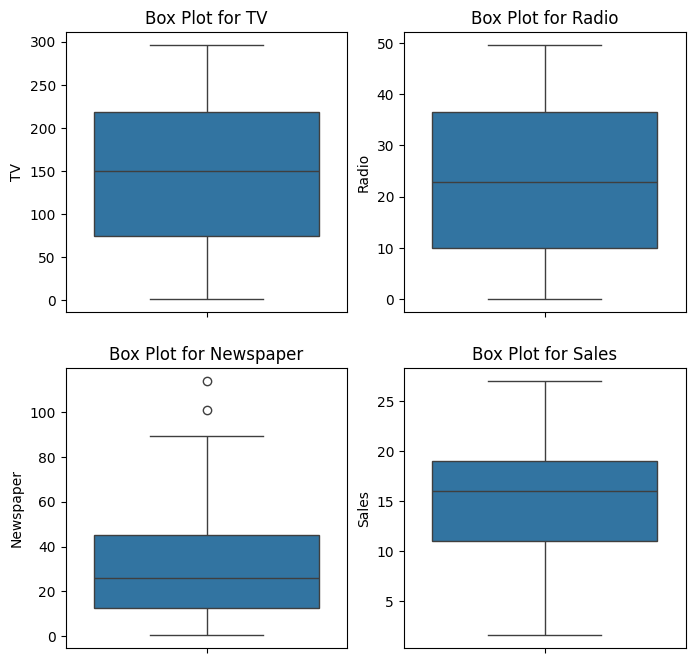

In [ ]:
#Checking for Outliers by creating box plots
plt.figure(figsize=(8,8))

for i, feature in enumerate(sales_df):
  plt.subplot(2,2,i+1)
  sns.boxplot(data=sales_df[feature])
  plt.title(f'Box Plot for {feature}')

plt.show()


There is no missing values and no considerable outliers present in the dataset. So, we can move onto the next step of data science process model.


In [ ]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


#IV. Data Exploration

###Descriptive Statistical Analysis

Let us perform descriptive statistical analysis on our dataset for measuring Central tendency, Spread/dispersion and Shape of distribution.

In [ ]:
print(sales_df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


###Visualizations
Using visualizations to understand the distribution of features and relationships between them by creating various techniques like histograms, scatter plots, count plots, etc.

Let us use a pair plot to visualize the relationship between all pairs of data that we have.

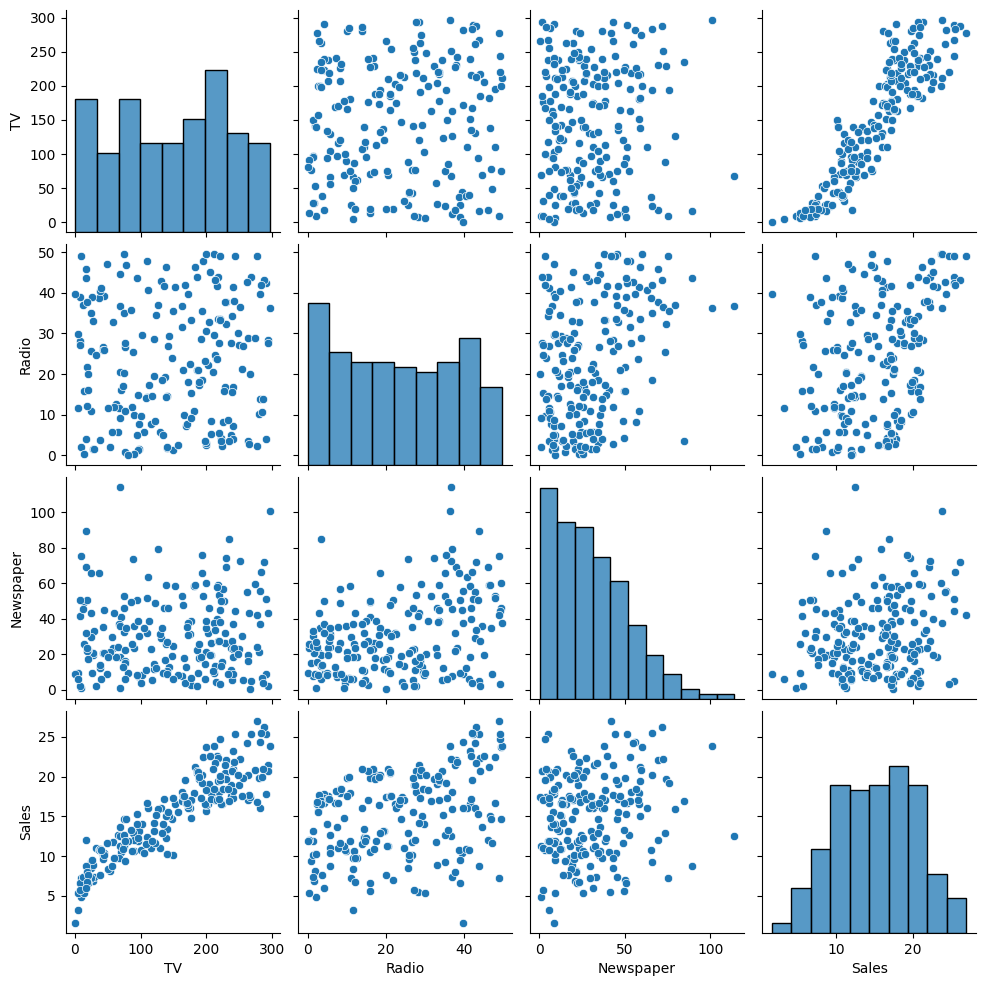

In [ ]:
sns.pairplot(sales_df)

Line plot to find the sales trend through TV advertisement

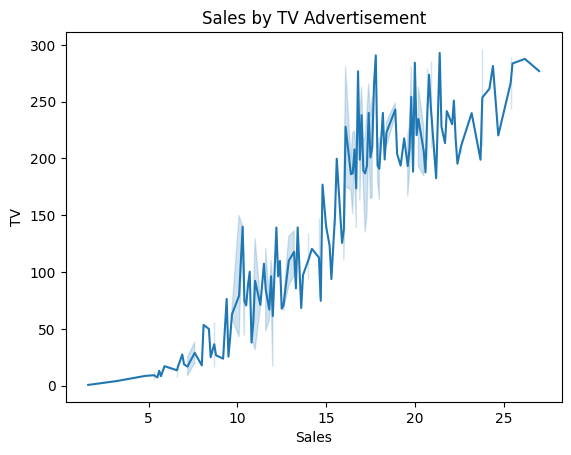

In [ ]:
# Example: Line plot for 'TV vs Sales'
sns.lineplot(x='Sales', y='TV', data=sales_df)
plt.title('Sales by TV Advertisement')
plt.show()

Bar chart visualization for Average sales through Various Advertising platforms

In [ ]:
 #Let us change the table from wider to longer format for analysis purpose.
long_data=pd.melt(sales_df[['TV', 'Radio', 'Newspaper']])
long_data

,variable,value
0,TV,230.1
1,TV,44.5
2,TV,17.2
3,TV,151.5
4,TV,180.8
...,...,...
595,Newspaper,13.8
596,Newspaper,8.1
597,Newspaper,6.4
598,Newspaper,66.2


<Axes: xlabel='variable', ylabel='value'>

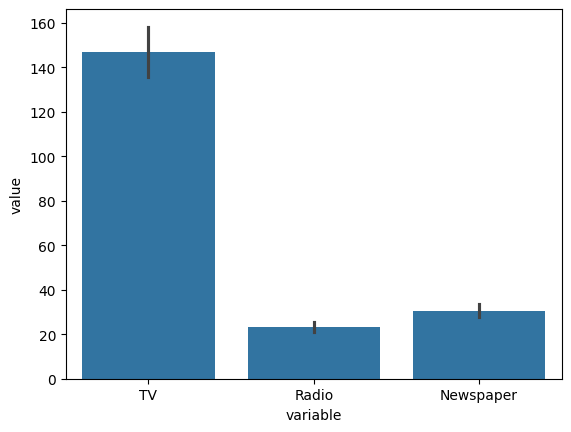

In [ ]:
sns.barplot(x='variable', y='value', data=long_data, estimator=np.mean)

Histogram to find distribution of each variable.

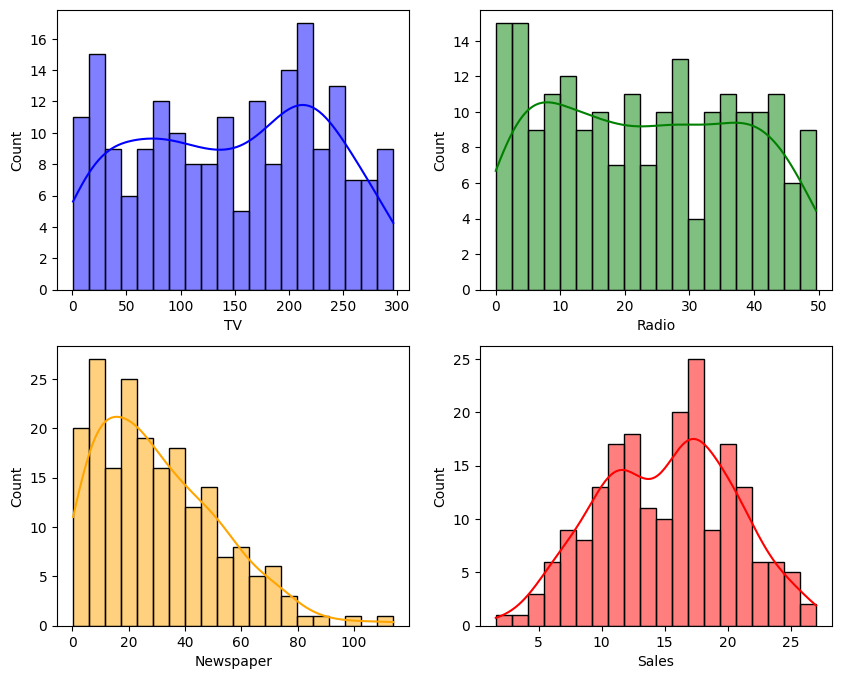

In [ ]:
plt.figure(figsize=(10,8))
colors=['blue', 'green', 'orange', 'red']
for i, feature in enumerate(sales_df):
  plt.subplot(2,2,i+1)
  sns.histplot(sales_df[feature], bins=20, kde=True, color=colors[i])

Violin plot to find distribution of data.

<Axes: xlabel='variable', ylabel='value'>

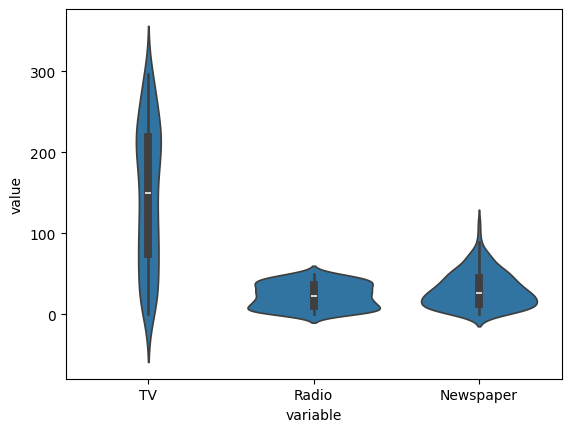

In [ ]:
sns.violinplot(x='variable', y='value', data=long_data)

To explore the correlation between features, a correlation matrix can be used which will give us an idea of how different features are related.

In [ ]:
correlation = sales_df.corr()
print(correlation)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


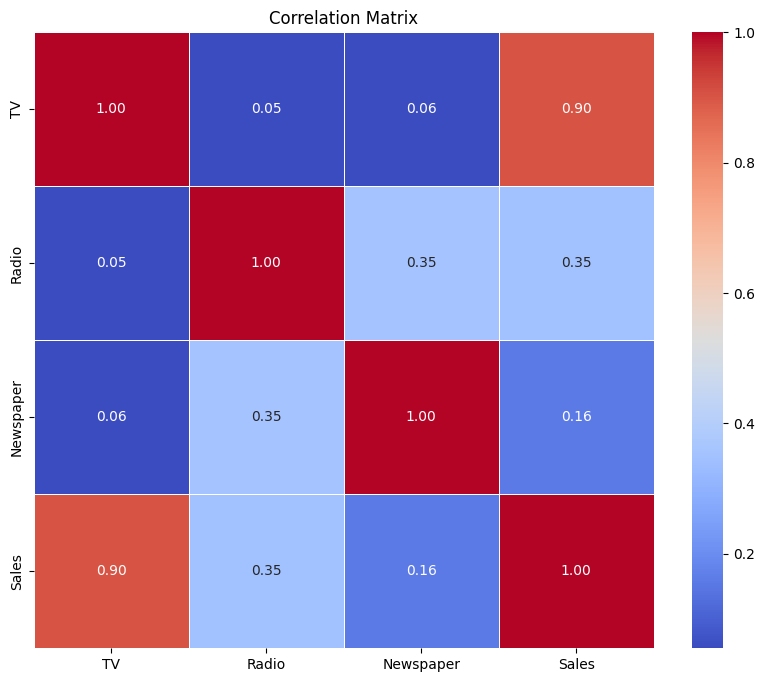

In [ ]:
# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

#V. Data Modeling

The next few steps in this phase are crucial for building a predictive model and it involves preparing the data for model training, selecting a model, training the model, and evaluating its performance.

##1. Model Selection and Execution

Let `X` be the new dataframe which comprises of independent variables and `y` be the dependent or target variable of our `sales_df`.

In [ ]:
# Defining features (X) and target variable (y)
X = sales_df.drop('Sales', axis=1)
y = sales_df['Sales']

Let us split the dataset into Train and Test sets in 80 : 20 ratio.

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let us use different regression models(for prediction of continuous value) and train them with our data. Finally, will choose one best performing model among them.

###1. Multiple Linear Regression

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the Linear Regression model
linear = LinearRegression()
linear.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, linear.predict(X_train))
train_r2 = r2_score(y_train, linear.predict(X_train))

print('Model: Linear Regression\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Linear Regression

Training Mean Squared Error: 2.676142653782669
Training R-squared: 0.9001416005862131

Test Mean Squared Error: 2.9077569102710896
Test R-squared: 0.9059011844150826


###2. Random Forest Regressor

In [ ]:
# Initializing and Training the RandomForest model
randomForest = RandomForestRegressor(random_state=42)
randomForest.fit(X_train, y_train)

# Making predictions on the test set
y_pred_random = randomForest.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, randomForest.predict(X_train))
train_r2 = r2_score(y_train, randomForest.predict(X_train))

print('Model: Random Forest Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_random)
test_r2 = r2_score(y_test, y_pred_random)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Random Forest Regressor

Training Mean Squared Error: 0.23202175624999793
Training R-squared: 0.9913422697495026

Test Mean Squared Error: 1.4374328500000009
Test R-squared: 0.9534827934927883


###3. Decision Tree Regressor

In [ ]:
# Initializing and Training the Decision Trees model
decisionTree = DecisionTreeRegressor(random_state=42)
decisionTree.fit(X_train, y_train)

# Making predictions on the test set
y_pred_decisionTree = decisionTree.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, decisionTree.predict(X_train))
train_r2 = r2_score(y_train, decisionTree.predict(X_train))

print('Model: Decision Tree Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_decisionTree )
test_r2 = r2_score(y_test, y_pred_decisionTree )

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Decision Tree Regressor

Training Mean Squared Error: 0.0
Training R-squared: 1.0

Test Mean Squared Error: 3.4019999999999997
Test R-squared: 0.8899068317956319


###4. Support Vector Regression

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the Support Vector Machines (SVM -> SVR) model
svm = SVR()
svm.fit(X_train, y_train)

# Making predictions on the test set
y_pred_svm = svm.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, svm.predict(X_train))
train_r2 = r2_score(y_train, svm.predict(X_train))

print('Model: Support Vector Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_svm)
test_r2 = r2_score(y_test, y_pred_svm)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Support Vector Regressor

Training Mean Squared Error: 3.4825635047872154
Training R-squared: 0.8700505681364318

Test Mean Squared Error: 3.499087197255254
Test R-squared: 0.886764963148391


###5. Gradient Boosting Regressor

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the Gaussian Naive Bayes model
gBoost = GradientBoostingRegressor()
gBoost.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gBoost = gBoost.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, gBoost.predict(X_train))
train_r2 = r2_score(y_train, gBoost.predict(X_train))

print('Model: Gradient Boosting Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_gBoost)
test_r2 = r2_score(y_test, y_pred_gBoost)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: Gradient Boosting Regressor

Training Mean Squared Error: 0.1819153109351356
Training R-squared: 0.9932119568614299

Test Mean Squared Error: 1.255260979893099
Test R-squared: 0.9593781134039533


###6. K-Nearest Neighbors Regressor

In [ ]:
#Random State
np.random.seed(42)

# Initializing and Training the K-Nearest Neighbors (KNN) model
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn.predict(X_test)

# Train set metrics
train_mse = mean_squared_error(y_train, knn.predict(X_train))
train_r2 = r2_score(y_train, knn.predict(X_train))

print('Model: K-Nearest Neighbors Regressor\n')

print(f'Training Mean Squared Error: {train_mse}')
print(f'Training R-squared: {train_r2}\n')

# Test set metrics
test_mse = mean_squared_error(y_test, y_pred_knn)
test_r2 = r2_score(y_test, y_pred_knn)

print(f'Test Mean Squared Error: {test_mse}')
print(f'Test R-squared: {test_r2}')

Model: K-Nearest Neighbors Regressor

Training Mean Squared Error: 1.7042725000000005
Training R-squared: 0.9364062585473988

Test Mean Squared Error: 3.115529999999999
Test R-squared: 0.8991773755626823


##2. Model Diagnostic and Comparison

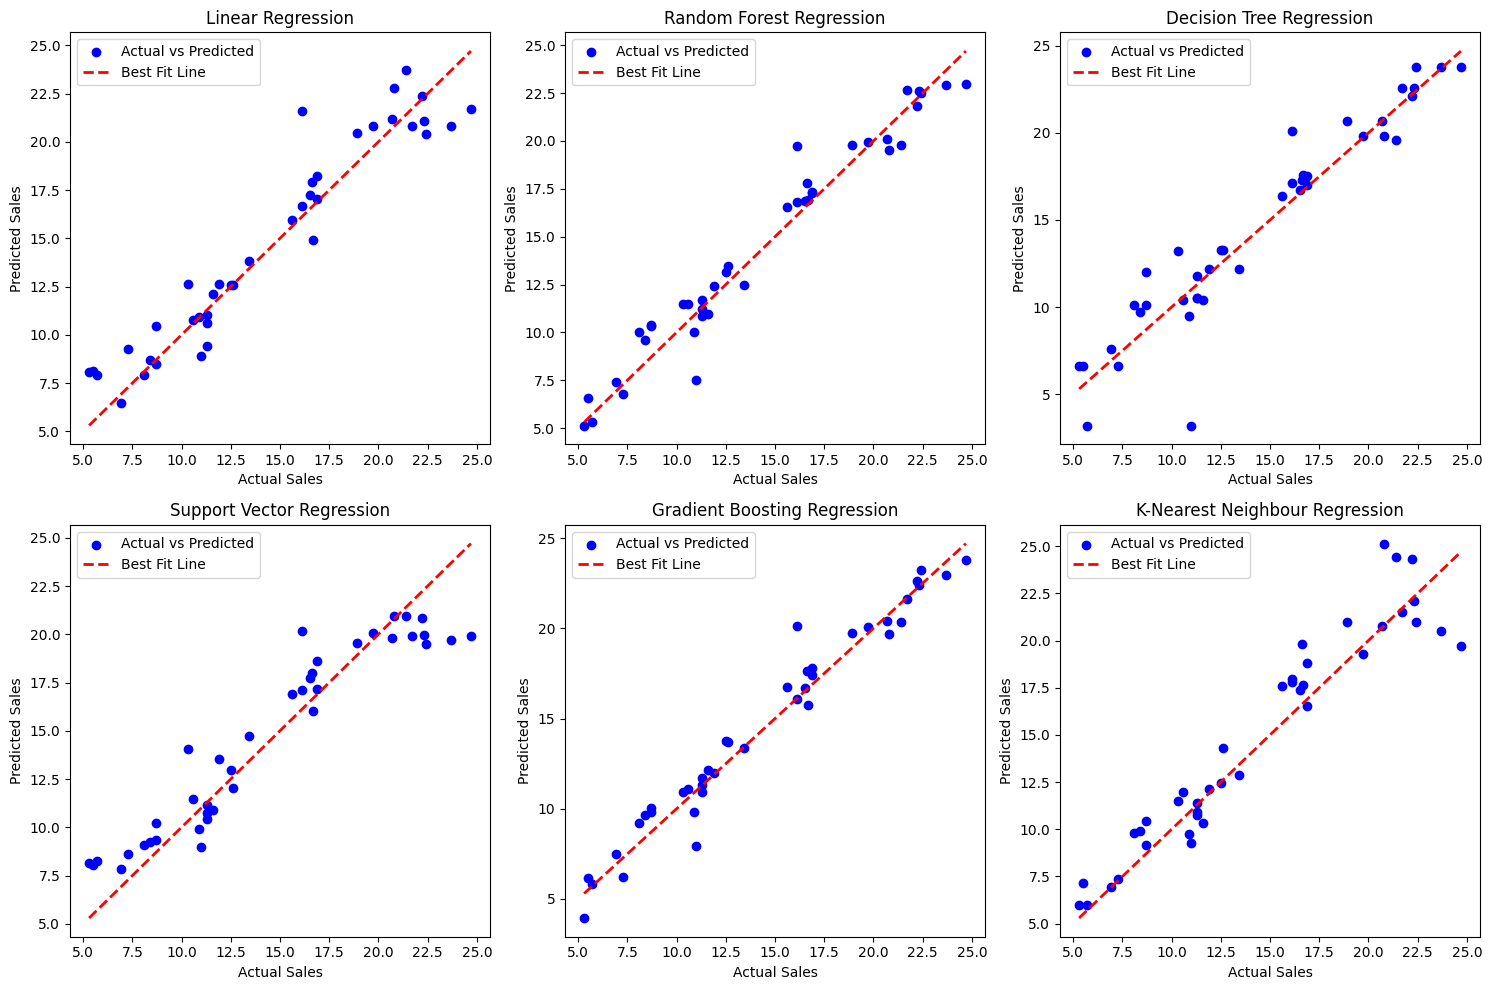

In [ ]:
def plot_best_fit_line_subplot(y_test, y_pred, model_name, ax):
    ax.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Best Fit Line')
    ax.set_xlabel('Actual Sales')
    ax.set_ylabel('Predicted Sales')
    ax.set_title(model_name)
    ax.legend()

# Example use case:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Linear Regression
plot_best_fit_line_subplot(y_test, y_pred, 'Linear Regression', axes[0, 0])

# Random Forest Regression
plot_best_fit_line_subplot(y_test, y_pred_random, 'Random Forest Regression', axes[0, 1])

# Decision Tree Regression
plot_best_fit_line_subplot(y_test, y_pred_decisionTree, 'Decision Tree Regression', axes[0, 2])

# Support Vector Regression
plot_best_fit_line_subplot(y_test, y_pred_svm, 'Support Vector Regression', axes[1, 0])

# Gradient Boosting Regression
plot_best_fit_line_subplot(y_test, y_pred_gBoost, 'Gradient Boosting Regression', axes[1, 1])

# K-Nearest Neighbour Regression
plot_best_fit_line_subplot(y_test, y_pred_knn, 'K-Nearest Neighbour Regression', axes[1, 2])

plt.tight_layout()
plt.show()


#VI. Automation and Presentation

##Automation

From the above comparisons between trained models, the best performing models are
1. Random Forest Regression &
2. Gradient Boosting Regression model

I selected Gradient Boosting Regression model for automation.

In [ ]:
def make_predictions(new_data):
    predictions = gBoost.predict(new_data)
    predictions = pd.DataFrame({
      'Gradient Boosting': predictions
  })
    return predictions

# Sample data for testing
new_data = pd.DataFrame({
    'TV': [150, 80, 200],
    'Radio': [20, 10, 5],
    'Newspaper': [30, 5, 15],
})

predictions = make_predictions(new_data)
print(new_data)
print("\nSales Result:")
print(predictions)

    TV  Radio  Newspaper
0  150     20         30
1   80     10          5
2  200      5         15

Sales Result:
   Gradient Boosting
0          13.634694
1          11.251947
2          17.564675


In [ ]:
# Save the model
dump(gBoost, 'trained_sales_model.joblib')

# Load the model for predictions
loaded_model = load('trained_sales_model.joblib')
new_predictions = loaded_model.predict(new_data)
new_predictions

array([13.63469434, 11.25194653, 17.5646747 ])

##Presentation

I used Google Colab to create presentations, which provide an interactive way to share findings. I incorporated code, visualizations, and explanations within the analyses.

#**Conclusion**


In conclusion, this sales predictions project aimed to predict sales using machine learning techniques, and several regression models were explored and evaluated, including Linear Regression, Random Forest Regressor, Decision Tree Regressor, Support Vector Regressor, Gradient Boosting Regressor, and K-Nearest Neighbors Regressor.

**Key takeaways:**

*Random Forest Regressor* and *Gradient Boosting Regressor* stood out with high R-squared values on both training and test sets, indicating good predictive performance
